<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Classification/k-NN%20Classifiers%20Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **k-NN Dataset Heart Failure Predicton**

- K-Nearest Neighbor adalah salah satu Machine Learning paling sederhana berdasarkan teknik Supervised Learning.
- Algoritma K-NN mengasumsikan kemiripan antara kasus/data baru dengan kasus yang tersedia dan memasukkan kasus baru tersebut ke dalam kategori yang paling mirip dengan kategori yang tersedia.
- Algoritma K-NN menyimpan semua data yang tersedia dan mengklasifikasikan titik data baru berdasarkan kesamaannya. Artinya ketika data baru muncul maka dapat dengan mudah diklasifikasikan ke dalam kategori well suite dengan menggunakan algoritma K-NN.
- Algoritma K-NN dapat digunakan untuk Regression dan juga Classification tetapi sebagian besar digunakan untuk masalah CLassification.
- K-NN merupakan non-parametic algorithm, artinya tidak membuat asumsi apapun terhadap data yang mendasarinya.
- Algoritma ini juga disebut sebagailazy learner algorithm karena algoritma ini tidak langsung belajar dari training set, melainkan menyimpan dataset dan pada saat classification, ia melakukan suatu tindakan pada dataset tersebut.
- Algoritma KNN pada tahap pelatihan hanya menyimpan dataset dan ketika mendapat data baru, maka ia mengklasifikasikan data tersebut ke dalam kategori yang mirip dengan data baru.
- Contoh: Misalkan kita mempunyai gambar makhluk yang mirip dengan kucing dan anjing, namun kita ingin mengetahui apakah itu kucing atau anjing. Jadi untuk identifikasi ini, kita dapat menggunakan algoritma KNN, karena algoritma ini bekerja pada ukuran kesamaan. Model KNN kami akan menemukan fitur serupa dari kumpulan data baru dengan gambar kucing dan anjing dan berdasarkan fitur yang paling mirip, model tersebut akan memasukkannya ke dalam kategori kucing atau anjing.

# **Why do we need KNN Algorithm ?**

Misalkan ada dua kategori yaitu Kategori A dan Kategori B, dan kita mempunyai titik data baru x1, maka titik data tersebut akan terletak pada kategori yang mana. Untuk menyelesaikan permasalahan seperti ini diperlukan algoritma K-NN. Dengan bantuan K-NN, kita dapat dengan mudah mengidentifikasi kategori atau kelas dari suatu dataset tertentu. Perhatikan diagram di bawah ini:

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png" width="600px">



# **How does KNN Algorithm Work ?**

Cara kerja K-NN dapat dijelaskan berdasarkan algoritma di bawah ini:

- Langkah-1: Pilih nomor K dari neighbors
- Langkah-2: Hitung jarak Euclidean dari K jumlah neighbors
- Langkah-3: Ambil K nearest neighbors sesuai jarak Euclidean yang dihitung.
- Langkah-4: Di antara k neighbors ini, hitung jumlah titik data di setiap kategori.
- Langkah-5: Tetapkan titik data baru ke kategori yang jumlah neighbors-nya maksimum.
- Langkah-6: Model kita sudah siap.

Misalkan kita memiliki titik data baru dan kita perlu memasukkannya ke dalam kategori yang diperlukan. Perhatikan gambar di bawah ini:

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning3.png" width="500px">

- Pertama kita pilih jumlah tetangganya, jadi kita pilih k=5.
- Selanjutnya kita akan menghitung jarak Euclidean antar titik data. Jarak Euclidean adalah jarak antara dua titik, yang telah kita pelajari dalam geometri. Ini dapat dihitung sebagai:

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning4.png" width="500px">

- Dengan menghitung jarak Euclidean kita mendapatkan nearest neighbors, yaitu tiga nearest neighbors pada kategori A dan dua nearest neighbors pada kategori B. Perhatikan gambar di bawah ini:

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning5.png" width="500px">

- Seperti yang kita lihat, 3 nearest neighbors berasal dari kategori A, maka titik data baru ini harus termasuk dalam kategori A.

# **Implementations**

## **Import Libraries**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Import Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/All Datasets/[Machine Learning Algorithm]/Dataset Machine Learning (Classification)/k Nearest Neighbours/heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Exploratory Data Analysis (EDA)**

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.shape

(918, 12)

In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


## **Data VIsualization**

In [12]:
df1 = df[df['HeartDisease'].isin([0,1])]
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


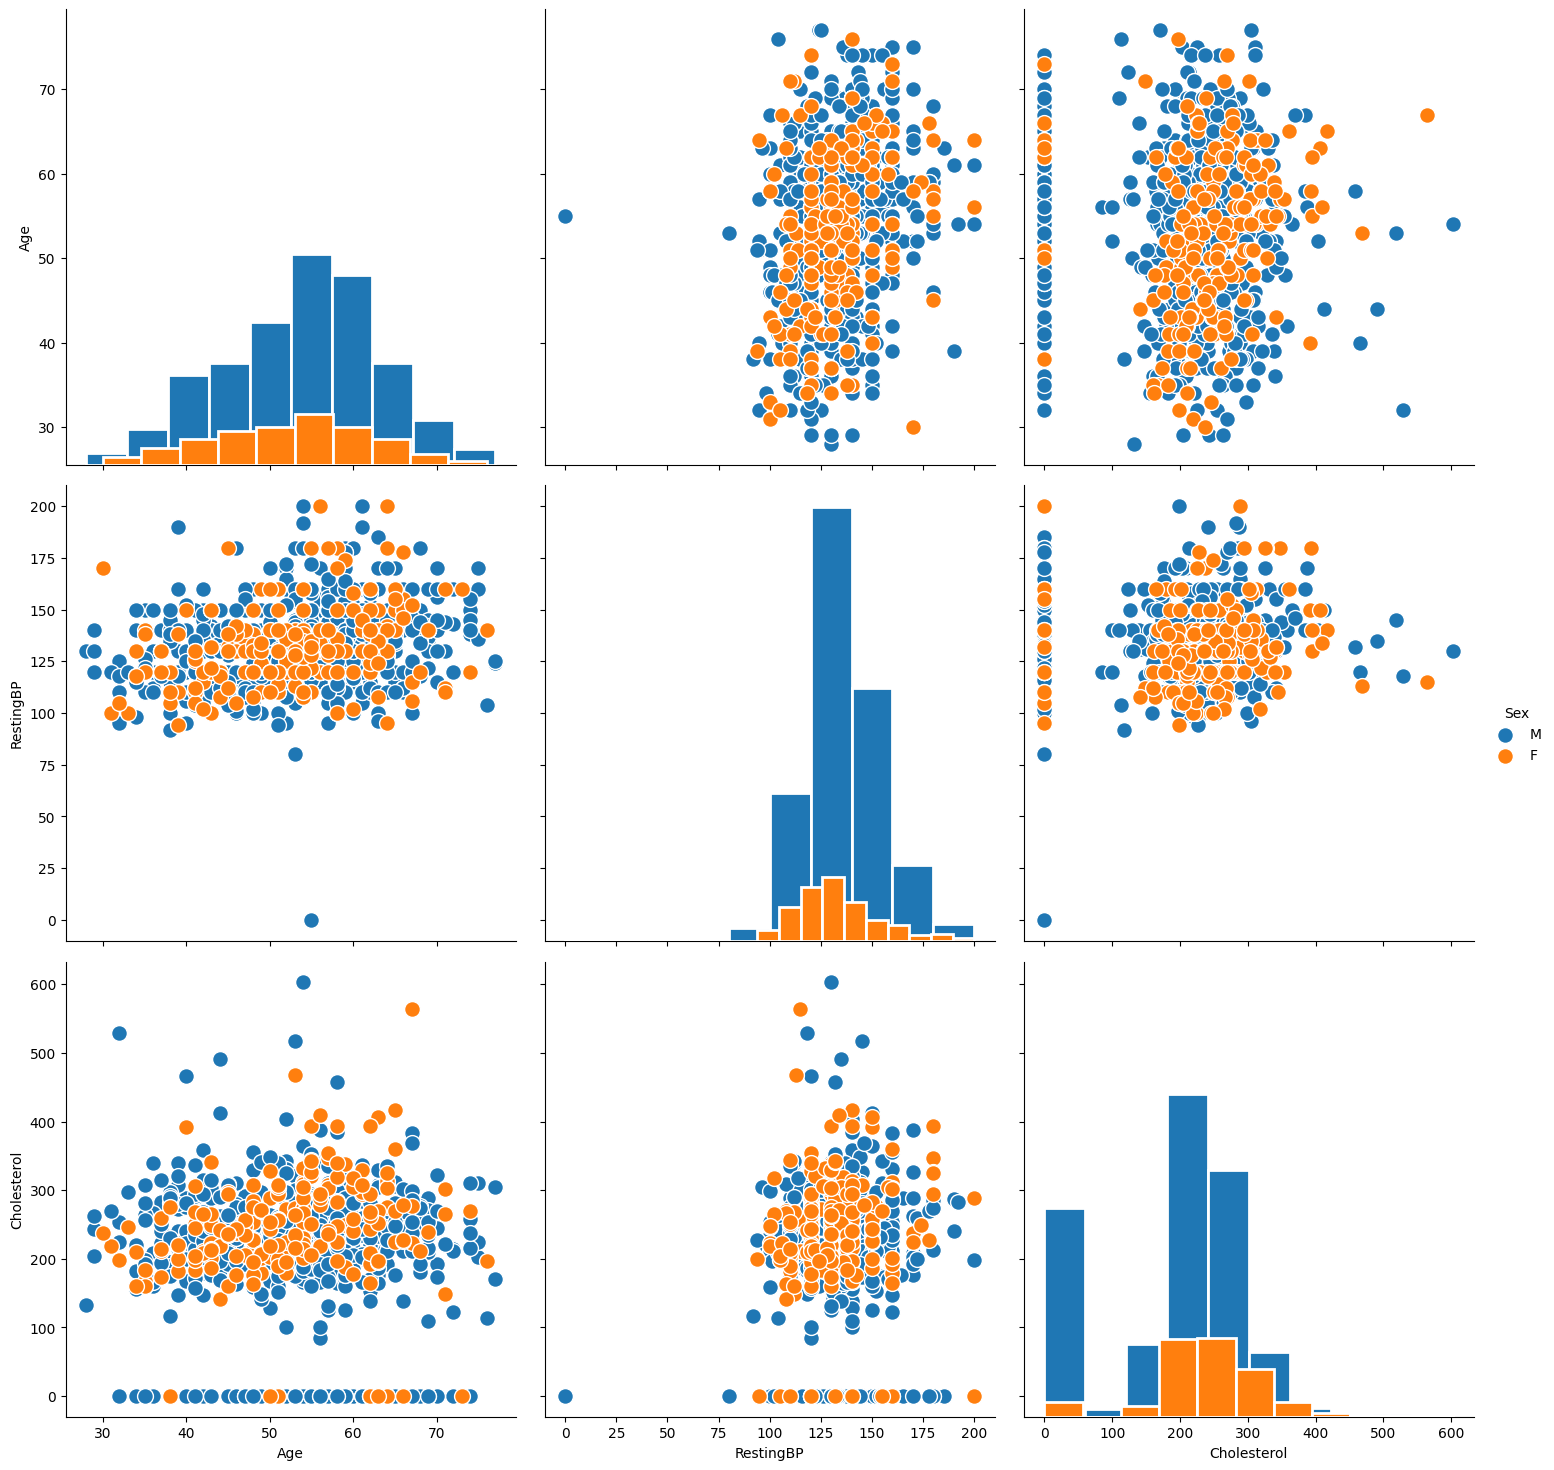

In [15]:
# Plot a subset of variables
g = sns.PairGrid(df1 , hue='Sex' ,vars=["Age","RestingBP","Cholesterol"],height=5, aspect=1)
g = g.map_offdiag(plt.scatter , edgecolor="w", s=130)
g = g.map_diag(plt.hist , edgecolor ='w', linewidth=2)
g = g.add_legend()
plt.show()

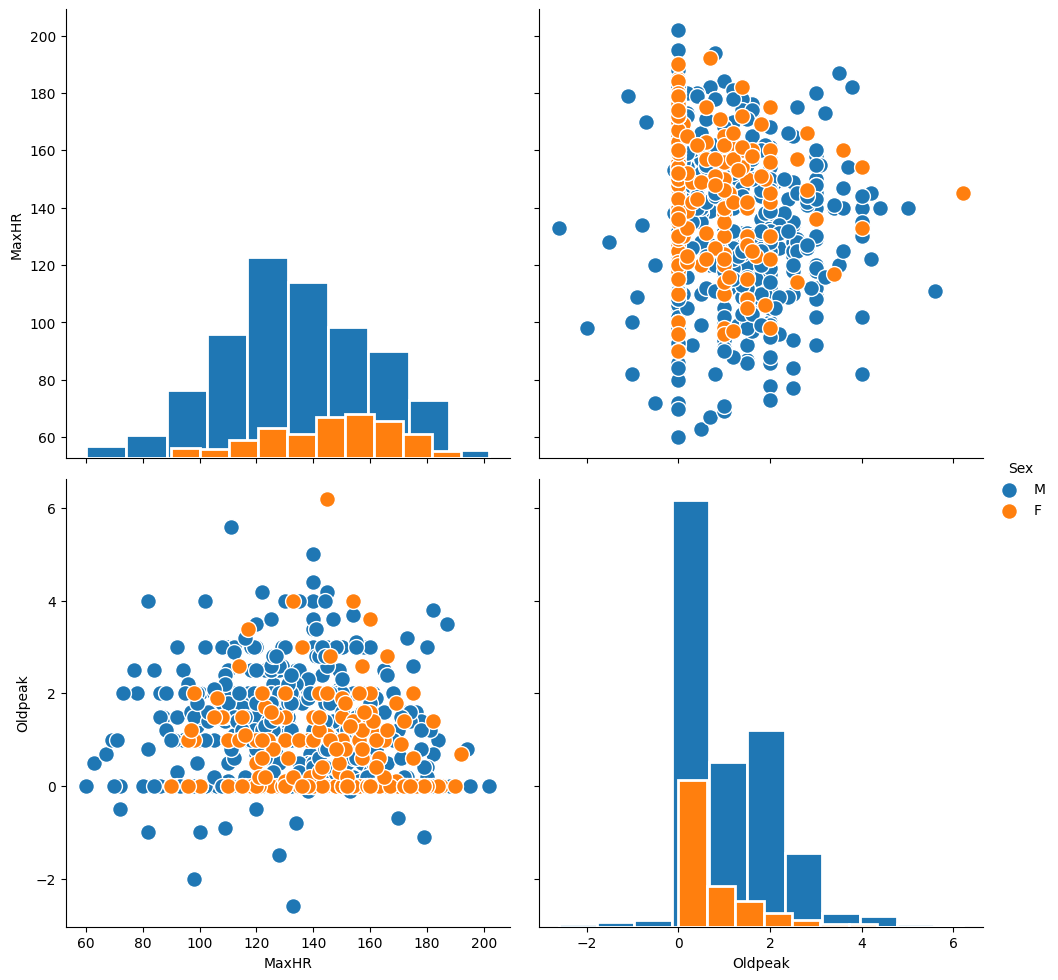

In [16]:
# Plot a subset of variables
g = sns.PairGrid(df1 , hue='Sex' ,vars=["MaxHR","Oldpeak"],height=5, aspect=1)
g = g.map_offdiag(plt.scatter , edgecolor="w", s=130)
g = g.map_diag(plt.hist , edgecolor ='w', linewidth=2)
g = g.add_legend()
plt.show()

## **Data Preprocessing**

In [34]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()

LABEL_ENCODING("Sex")
LABEL_ENCODING("ChestPainType")
LABEL_ENCODING("RestingECG")
LABEL_ENCODING("ExerciseAngina")
LABEL_ENCODING("ST_Slope")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## **Feature Scaling**

In [22]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [23]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114


## **Feature Selection**

In [24]:
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## **Prediction using kNN**

In [25]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [26]:
pred = knn.predict(X_test)
pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [27]:
print(confusion_matrix(y_test,pred))

[[105  21]
 [ 21 129]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.86      0.86      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



# **How to select the value of K in the K-NN Algorithm?**

- Tidak ada cara khusus untuk menentukan nilai terbaik untuk "K", jadi kita perlu mencoba beberapa nilai untuk menemukan nilai terbaiknya. Nilai K yang paling disukai adalah 5.
- Nilai K yang sangat rendah seperti K=1 atau K=2, dapat menimbulkan noise dan menimbulkan efek outlier pada model.
- Nilai K yang besar itu bagus, namun mungkin akan menemui beberapa kesulitan.

In [29]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

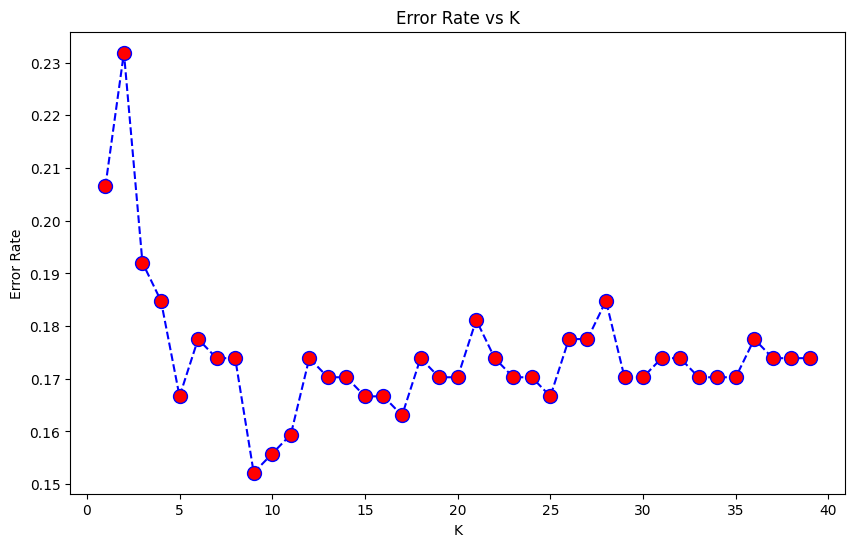

In [30]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8478260869565217


## **Advantages of KNN Algorithm :**

- Mudah diterapkan.
- Kuat terhadap trining data yang noisy.
- Akan lebih efektif jika training data-nya besar.

## **Disadvantages of KNN Algorithm :**
- Selalu perlu menentukan nilai K yang mungkin rumit pada suatu saat.
- Biaya komputasi yang tinggi karena menghitung jarak antar titik data untuk semua training sample.